In [1]:
# Import storiks.plot
import storiks.plot as plot
import re
import pandas as pd
# Load default options
options = plot.Options()

## 1. System Setup

In [13]:
!cat setup.txt

Linux alangepc 5.11.0-38-generic #42~20.04.1-Ubuntu SMP Tue Sep 28 20:41:07 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux

Samsung 970 EVO Plus 250GB (Over provision 30%)

Device         Boot     Start       End   Sectors  Size Id Type
/dev/nvme1n1p1           2048 341837823 341835776  163G 83 Linux
/dev/nvme1n1p2      341837824 488397167 146559344 69,9G  0 Empty

/dev/nvme1n1p1 on /media/auto/s970evp250oe type ext4 (rw,relatime)

Filesystem     Type      Size  Used Avail Use% Mounted on
/dev/nvme1n1p1 ext4      160G   87G   65G  58% /media/auto/s970evp250oe


## 2. Steady State Performance

### 2a. YCSB workloads A and B

File Name                      : Label
--------------------------------------------------
./exp_01-ycsb_workloada.out.xz : YCSB A
./exp_01-ycsb_workloadb.out.xz : YCSB B


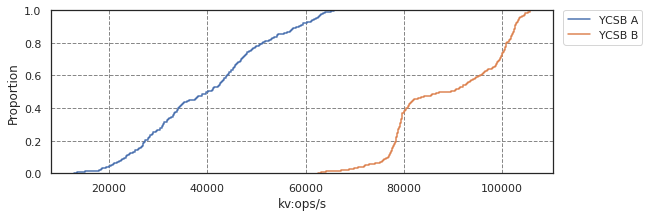

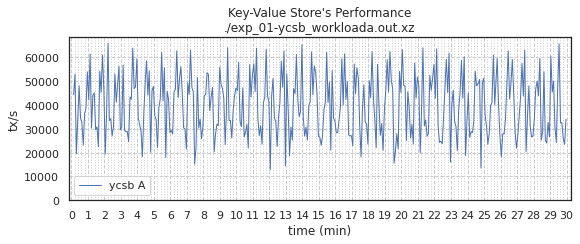

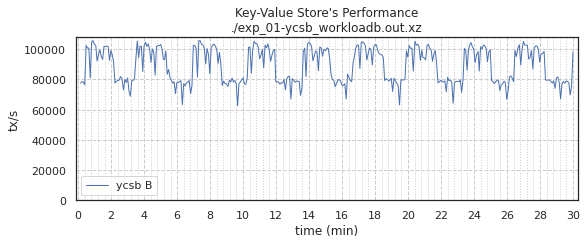

In [3]:
# Load steady-state experiment files (exp_01*)
af1_ycsb = plot.AllFiles(
    'exp_01-ycsb',
    options,
    plot.getFiles('.', str_filter='exp_01-ycsb'))
af1_ycsb.print_files()
# Plot the CDF of the database performance
af1_ycsb.graph_ecdf()
# Database telemetry
for f in af1_ycsb: f.graph_db()

### 2b. Access_time3 Executed Alone

#### iodepth2

File Name                           : Label
-------------------------------------------------------
./exp_01-iodepth2_ds0bs4wr00.out.xz : bs4,wr=0.0
./exp_01-iodepth2_ds0bs4wr01.out.xz : bs4,wr=0.1
./exp_01-iodepth2_ds0bs4wr05.out.xz : bs4,wr=0.5
./exp_01-iodepth2_ds0bs4wr09.out.xz : bs4,wr=0.9
./exp_01-iodepth2_ds0bs4wr10.out.xz : bs4,wr=1.0


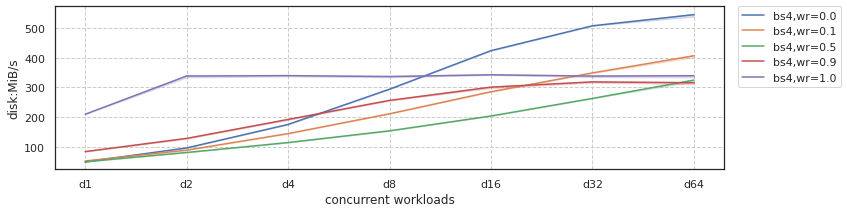

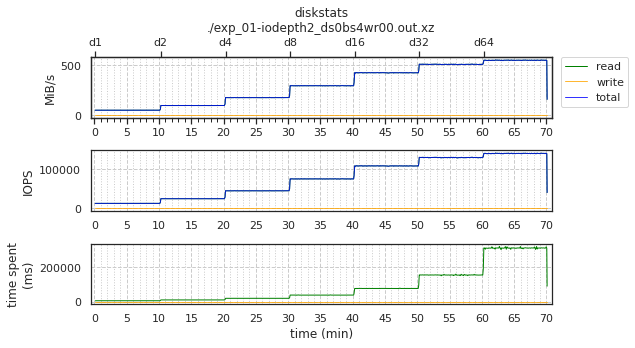

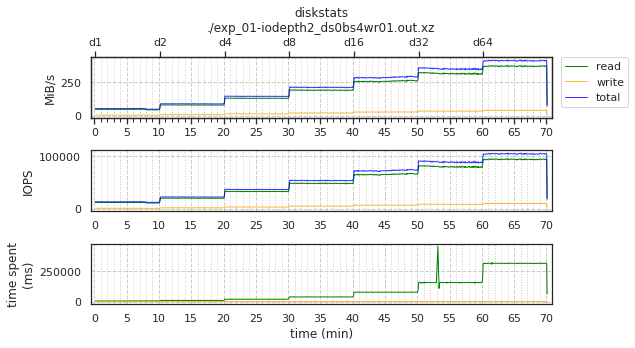

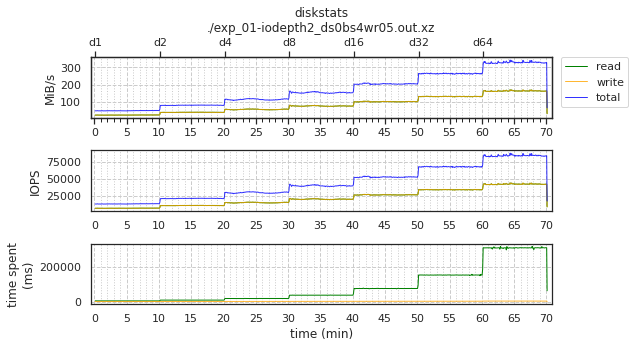

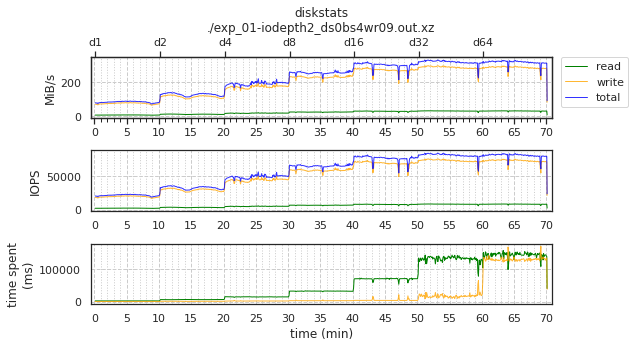

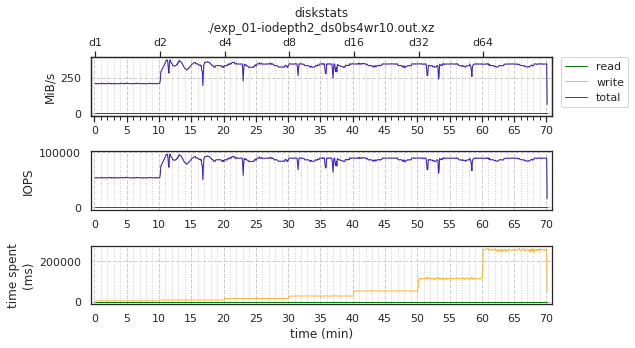

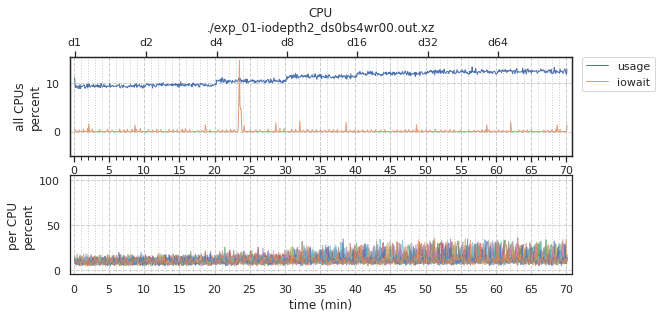

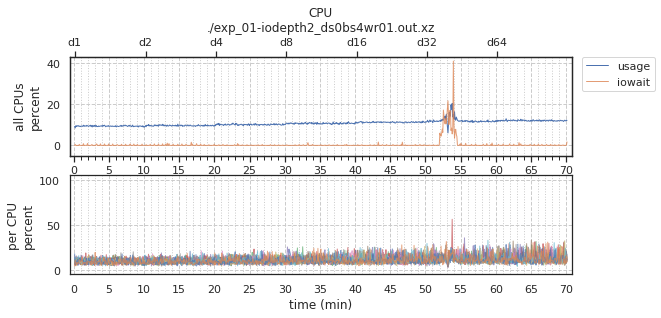

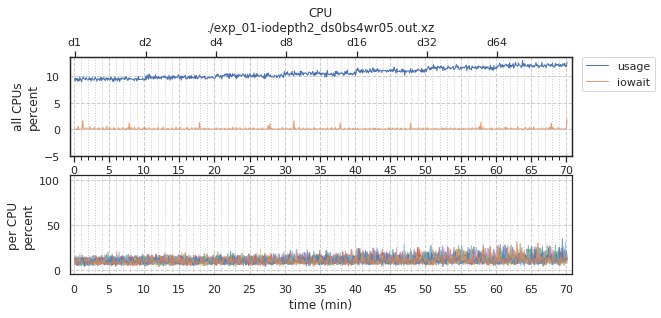

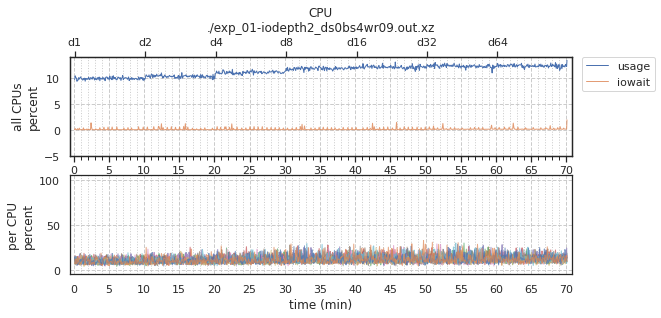

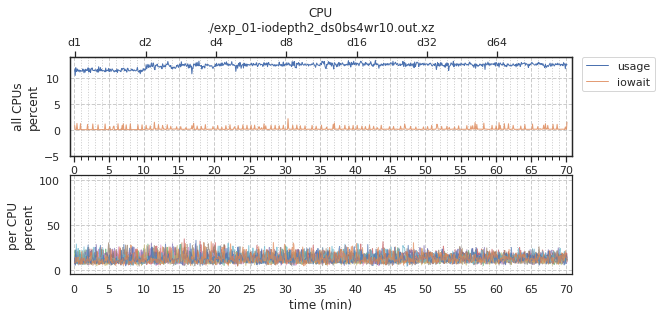

In [4]:
af1_at3ds0 = plot.AllFiles(
    'exp_01-iodepth2_ds0',
    options(w_labels=[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('', str_filter='exp_01-iodepth2_ds0bs'))
af1_at3ds0.print_files()
af1_at3ds0.graph_io_w()
for f in af1_at3ds0: f.graph_io()
for f in af1_at3ds0: f.graph_cpu()

In [5]:
af1_at3ds0_data = None
for f in af1_at3ds0:
    df = f.pd_data.groupby(['w', 'w_name'], as_index=False).agg({'access_time3[0].total_MiB/s':'mean'})
    df = df.rename(columns={'access_time3[0].total_MiB/s':f'{f.file_label}(MiB/s)'})
    af1_at3ds0_data = df if af1_at3ds0_data is None else \
               pd.merge(af1_at3ds0_data, df, how='inner', on=['w', 'w_name'])
af1_at3ds0_data

,w,w_name,"bs4,wr=0.0(MiB/s)","bs4,wr=0.1(MiB/s)","bs4,wr=0.5(MiB/s)","bs4,wr=0.9(MiB/s)","bs4,wr=1.0(MiB/s)"
0,0,d1,49.654959,52.622583,50.047083,84.191333,209.653500
1,1,d2,96.342353,88.981008,81.186807,128.464202,338.592689
2,2,d4,175.181008,144.530252,114.480168,192.210588,339.344370
3,3,d8,293.568655,211.060252,153.818992,256.064370,336.179748
4,4,d16,423.059244,285.088655,203.676807,300.664286,342.182857
5,5,d32,506.682773,348.357949,262.671176,318.299412,337.698908
6,6,d64,547.445983,408.799746,326.486525,317.228136,341.228814


File Name                           : Label
-------------------------------------------------------
./exp_01-iodepth2_ds1bs4wr00.out.xz : bs4,wr=0.0
./exp_01-iodepth2_ds1bs4wr01.out.xz : bs4,wr=0.1
./exp_01-iodepth2_ds1bs4wr05.out.xz : bs4,wr=0.5
./exp_01-iodepth2_ds1bs4wr09.out.xz : bs4,wr=0.9
./exp_01-iodepth2_ds1bs4wr10.out.xz : bs4,wr=1.0


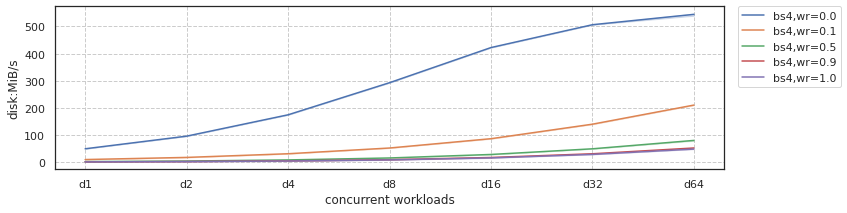

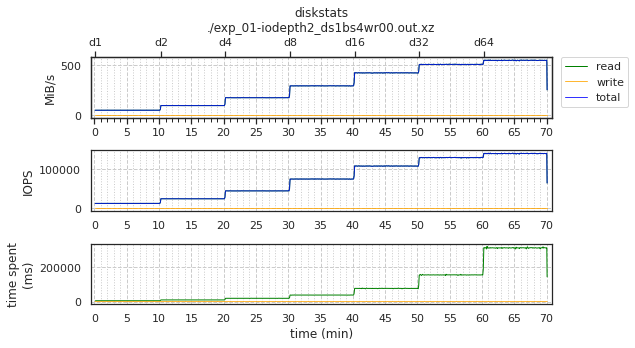

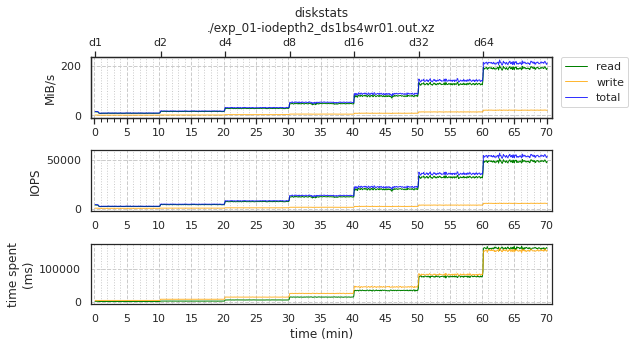

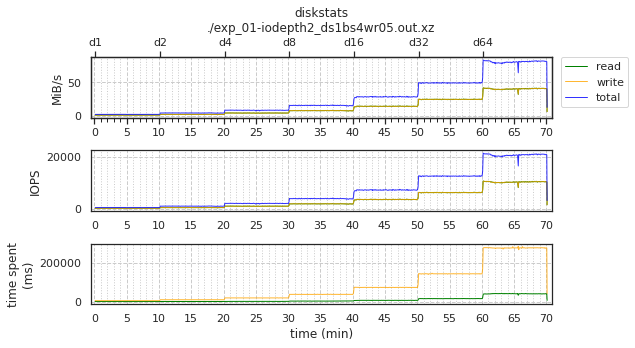

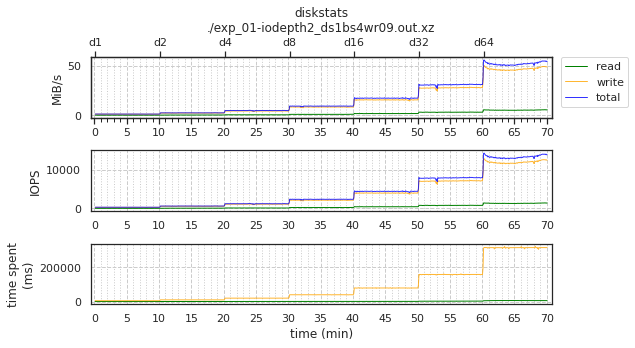

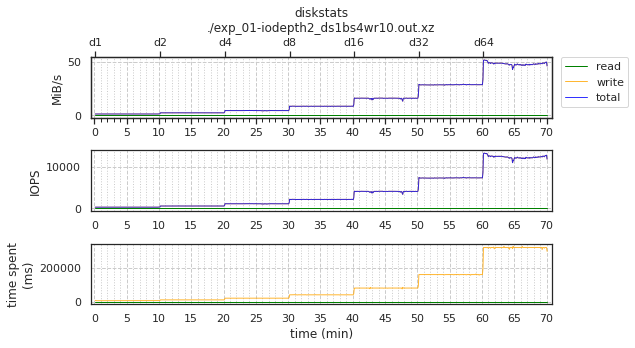

In [6]:
af1_at3ds1 = plot.AllFiles(
    'exp_01-iodepth2_ds1bs',
    options(w_labels=[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('', str_filter='exp_01-iodepth2_ds1bs'))
af1_at3ds1.print_files()
af1_at3ds1.graph_io_w()
for f in af1_at3ds1: f.graph_io()
# for f in af1_at3ds1: f.graph_cpu()

In [7]:
af1_at3ds1_data = None
for f in af1_at3ds1:
    df = f.pd_data.groupby(['w', 'w_name'], as_index=False).agg({'access_time3[0].total_MiB/s':'mean'})
    df = df.rename(columns={'access_time3[0].total_MiB/s':f'{f.file_label}(MiB/s)'})
    af1_at3ds1_data = df if af1_at3ds1_data is None else \
               pd.merge(af1_at3ds1_data, df, how='inner', on=['w', 'w_name'])
af1_at3ds1_data

,w,w_name,"bs4,wr=0.0(MiB/s)","bs4,wr=0.1(MiB/s)","bs4,wr=0.5(MiB/s)","bs4,wr=0.9(MiB/s)","bs4,wr=1.0(MiB/s)"
0,0,d1,49.306033,9.711417,2.143250,1.229000,1.113083
1,1,d2,95.787059,17.593613,4.257899,2.447647,2.215378
2,2,d4,174.376555,31.108487,8.343613,4.792521,4.329160
3,3,d8,292.521261,52.251933,15.544874,9.262941,8.377731
4,4,d16,422.057563,86.414286,28.433277,17.315966,15.825210
5,5,d32,506.328571,139.826387,49.260588,30.976555,28.591092
6,6,d64,547.023077,210.375593,80.753644,52.301017,48.262881


## 2. Pressure Scale (iodepth2)

* For each YCSB workload X in (A, B):
    * For write ratio (wr) from 0 to 1:
        * 1 YCSB workload X
        * 1 access_time3 with the specified wr increasing iodepth from 1 to 64 (d1 to d64).
          *(random ratio (rr) is 1 for all experiments)*

File Name                                          : Label
----------------------------------------------------------------------
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr00.out.xz : YCSB A; wr0.0
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr01.out.xz : YCSB A; wr0.1
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr05.out.xz : YCSB A; wr0.5
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr09.out.xz : YCSB A; wr0.9
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr10.out.xz : YCSB A; wr1.0
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr00.out.xz : YCSB B; wr0.0
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr01.out.xz : YCSB B; wr0.1
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr05.out.xz : YCSB B; wr0.5
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr09.out.xz : YCSB B; wr0.9
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr10.out.xz : YCSB B; wr1.0


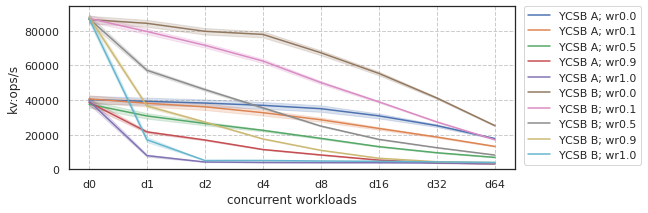

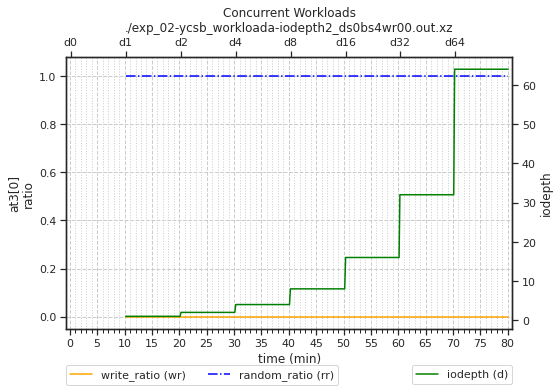

In [8]:
af2_ds0 = plot.AllFiles(
    'exp_02-ycsb-iodepth2_ds0',
    options(w_labels=['d0']+[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('.', list_filter=['exp_02-ycsb', 'iodepth2_ds0']))
af2_ds0.print_files()
af2_ds0.graph_dbmean()
#af3.graph_pressure()
if len(af2_ds0) > 0: af2_ds0[0].graph_at3_script()

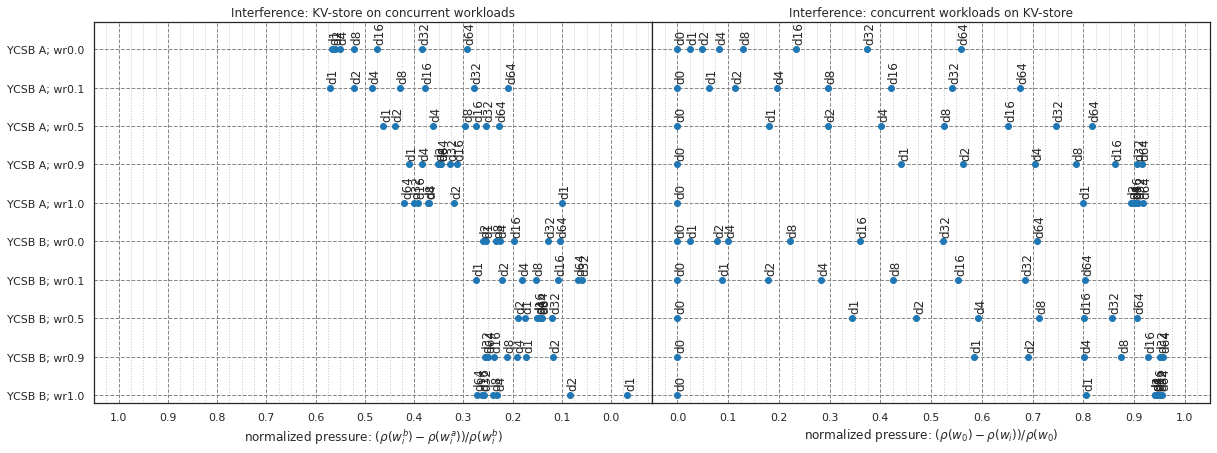

In [9]:
for f in af2_ds0:
    r = re.findall(r'iodepth2_([^.]+)\.out', f.filename)
    if len(r) > 0:
        for f2 in af1_at3ds0:
            r2 = re.findall(r'iodepth2_([^.]+)\.out', f2.filename)
            # print(r2)
            if len(r2) > 0 and r[0] == r2[0]:
                f.at3_steady_file = f2

af2_ds0.graph_join_pressure()

File Name                                          : Label
----------------------------------------------------------------------
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr00.out.xz : YCSB A; wr0.0
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr01.out.xz : YCSB A; wr0.1
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr05.out.xz : YCSB A; wr0.5
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr09.out.xz : YCSB A; wr0.9
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr10.out.xz : YCSB A; wr1.0
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr00.out.xz : YCSB B; wr0.0
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr01.out.xz : YCSB B; wr0.1
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr05.out.xz : YCSB B; wr0.5
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr09.out.xz : YCSB B; wr0.9
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr10.out.xz : YCSB B; wr1.0


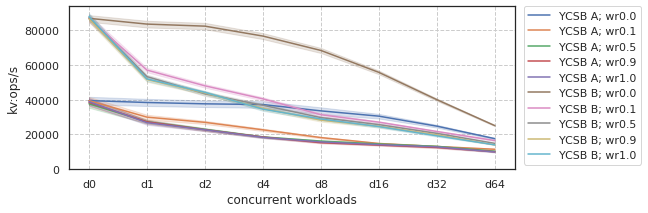

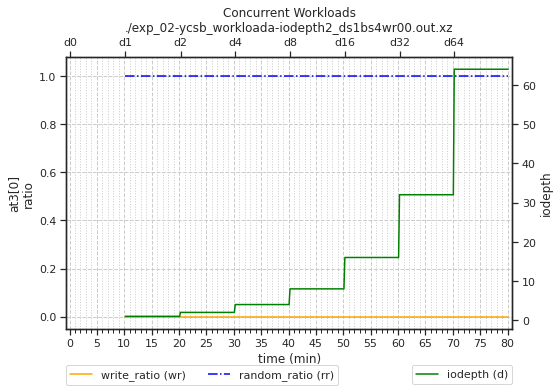

In [10]:
af2_ds1 = plot.AllFiles(
    'exp_02-ycsb-iodepth2_ds1',
    options(w_labels=['d0']+[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('.', list_filter=['exp_02-ycsb', 'iodepth2_ds1']))
af2_ds1.print_files()
af2_ds1.graph_dbmean()
#af2_ds1.graph_pressure()
if len(af2_ds1) > 0: af2_ds1[0].graph_at3_script()

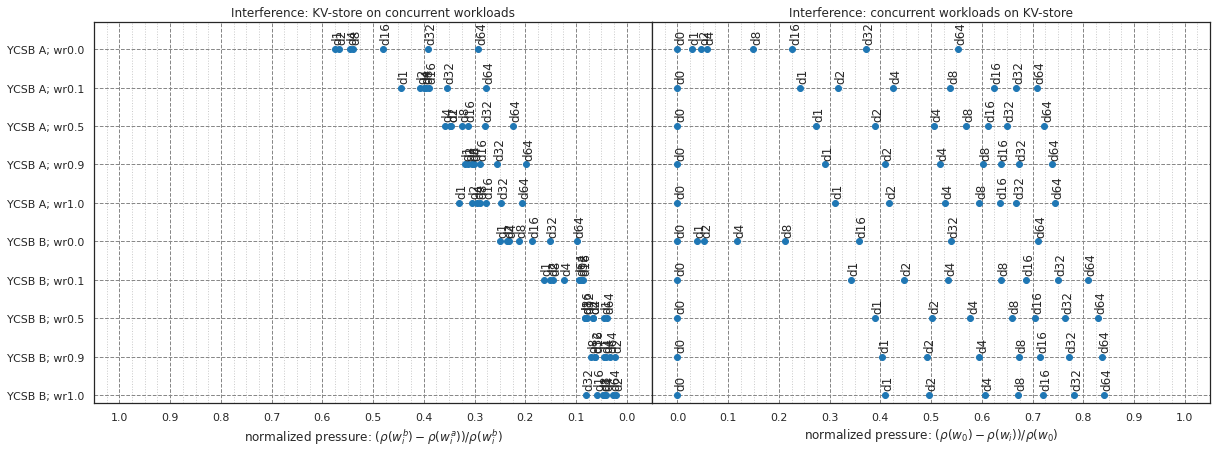

In [11]:
for f in af2_ds1:
    r = re.findall(r'iodepth2_([^.]+)\.out', f.filename)
    if len(r) > 0:
        for f2 in af1_at3ds1:
            r2 = re.findall(r'iodepth2_([^.]+)\.out', f2.filename)
            # print(r2)
            if len(r2) > 0 and r[0] == r2[0]:
                f.at3_steady_file = f2

af2_ds1.graph_join_pressure()

In [12]:
# for f in af2_ds0 + af2_ds1: f.graph_db()
# for f in af2_ds0 + af2_ds1: f.graph_pressure()
# for f in af2_ds0 + af2_ds1: f.graph_cpu()
# for f in af2_ds0: f.graph_io()
# for f in af2_ds1: f.graph_io()
# for f in af2_ds0 + af2_ds1: f.graph_db_summary()